## Pima Indians Diabetes Data Set

This data set represents the Pima Indian population and their predicted diabetes chance as per a study conducted by the National Institute of Diabetes and Digestive and Kidney Diseases. The study was conducted exclusively on females within the population and measured specific medical attributes within each individual. Those attributes are:
1. Pregnancies - Number of times pregnant
2. Glucose - Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. BloodPressure - Diastolic blood pressure (mmHg)
4. SkinThickness - Triceps skin fold thickness (mm)
5. Insulin - 2-Hour serum insulin (mu U/ml)
6. BMI - Body mass index (weight in kg/(height in m)42)
7. DiabetesPedigreeFunction - Diabetes pedigree function
8. Age - Age (years)
9. Outcome - Target Variable to predict whether or not patient will develop diabetes (1 yes 0 no)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import randrange

df = pd.read_csv('https://raw.githubusercontent.com/AvenashRamnarine/CSCI381/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


To preform our EDA the first thing we should do is check for any null values within the data set. Null values can cause complications within the data when evaluating different attributes therefore we should address them as early as possible.

In [2]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here we can see that the data does not contain any null values which is great. This means that we can begin analysis without having to worry about missing data.

Lets start by taking a look at the data as a whole. Using histograms seems to be the most practical approach here.

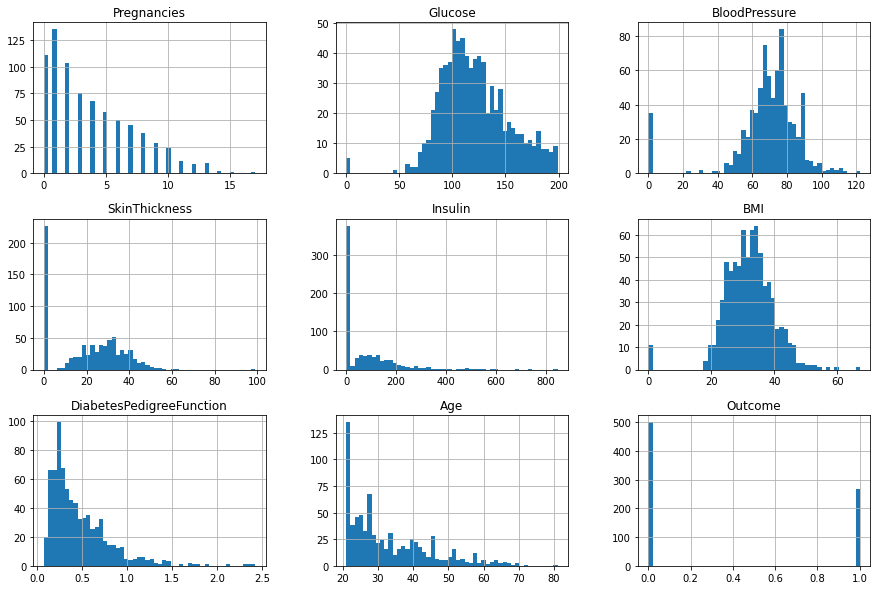

In [3]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Running this histograms gives us an insight into the data, however almost immediately you can spot an issue with it. There seems to be an abnormally large amount of '0' data points within the various attributes. For example in Glucose, BloodPressure, SkinThickness, Insulin, and BMI. Based on previous knowledege of these medical traits this is simply impossible for a human to have '0' of any of these attributes. We must remove them or change them.

Now that we have spotted a problem in the data lets see how many instances of it there are.

In [4]:
#Drop the last column 'outcome' since it will mess up our count
fixed = df.iloc[: , :-1]
#In the temp data frame replace all 0's with null
fixed = fixed.replace(0, np.nan)
#Count the amount of nulls within the data frame (representing # of zeros)
print(fixed.isnull().sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64


We can see here that there are a lot of values represented by 0 which, as we stated earlier, makes no sense. A solution to this issue is to replace these values with the mean of their respective columns. We could also drop these entries from the data set as that would be easiest. However given the large amount of data that has issues, the better approach would be to replace with the mean. This will ensure the data entries won't be dropped entirely and also wont skew the data in any particular direction. So in short, we have to calculate the mean of every affected column and insert that value to any instances of '0' (Or null in this implementation) 

In [5]:
#Create a series of all the means for each column in the data frame
column_means = fixed.mean()
#Fill all the null values with their respective means for that column
fixed = fixed.fillna(column_means)

#Extract the 'Outcome' column from our original data frame
extracted_col = df["Outcome"]
#Add the 'Outcome' column to the fixed data frame
fixed = fixed.join(extracted_col)
#Now that the fixed data frame mirrors the original data frame 
#with issues fixed, set our original data frame to fixed version
df = fixed
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1.000000,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8.000000,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1.000000,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,4.494673,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.000000,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2.000000,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5.000000,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1.000000,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


Now we can check our graphs again to see if the issue was fixed

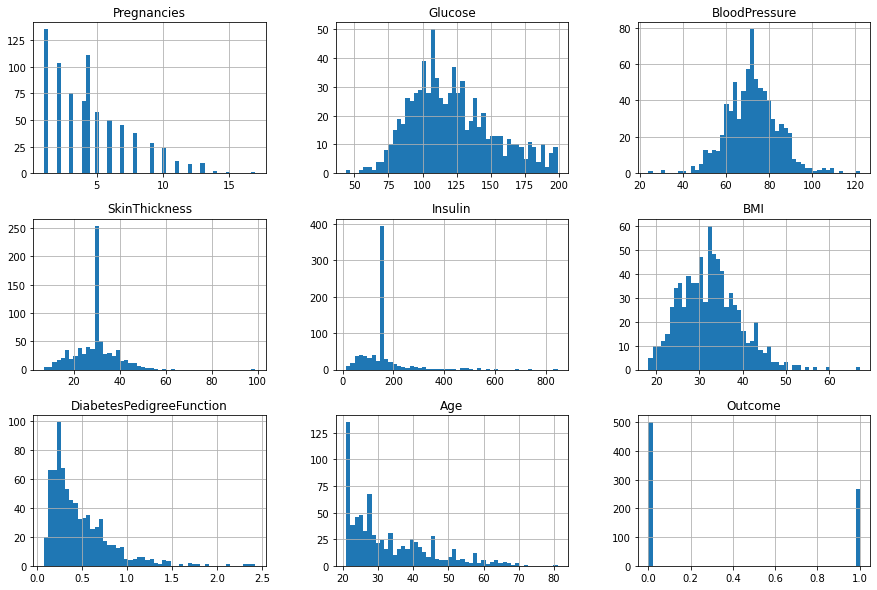

In [6]:
df.hist(bins=50, figsize=(15,10))
plt.show()

And as expected, there are no unwanted '0' values within the data frame and the data is fixed.

This not only helps clean up the data, but now we are able to accurately measure different aspects of the data. For example if we were to take the mean of each columns:

In [7]:
means = df.mean()
print(means)

Pregnancies                   4.494673
Glucose                     121.686763
BloodPressure                72.405184
SkinThickness                29.153420
Insulin                     155.548223
BMI                          32.457464
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64


We can see that now they more accurately represent the mean values

Another thing we can do is look for outliers within the data set. 

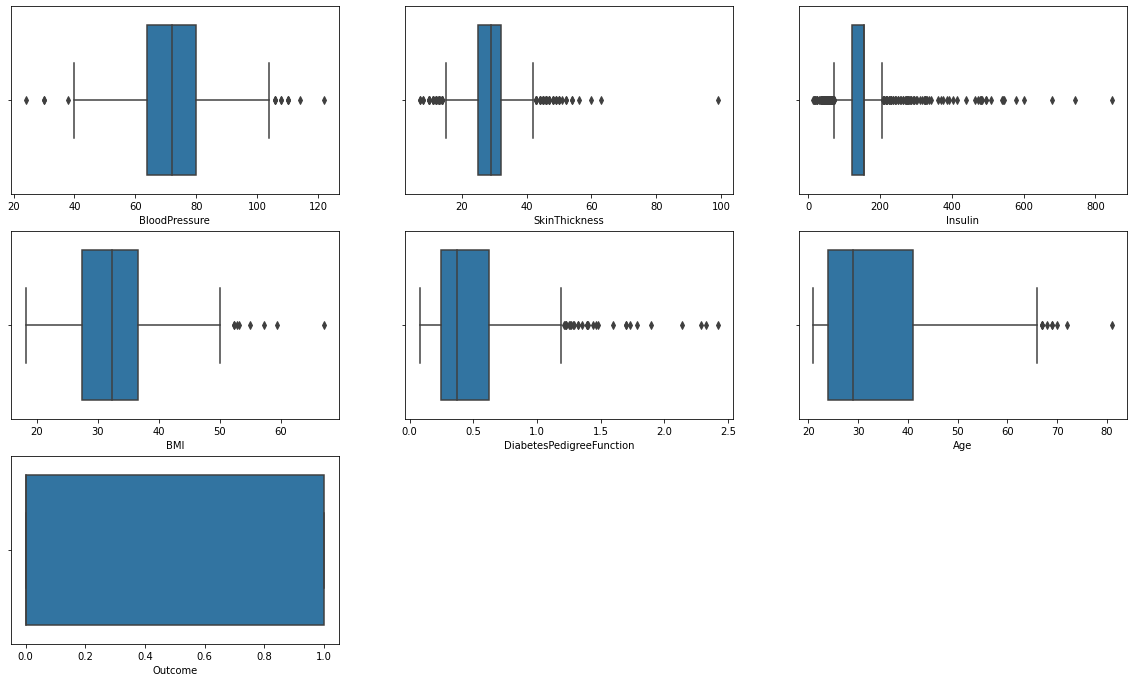

In [8]:
#define a figure to which we will add boxplots of each attribute.
plt.figure(figsize=(20,20))

#use an index to identify the spot of the subplot
j=1
columns=df.columns.tolist()
for k in columns[2:] :   #for each column in the dataframe except INDEX and TARGET
    plt.subplot(5,3,j) 
    sns.boxplot(x=k,data=df)
    j=j+1 #add 1 to go to the next subplot space

#show results
plt.show()

While it is important to recognize the outliers within the data set, it also should be noted that this data set has a variety of differing factors that may not be totally inline with each other. So while there does seem to be a large amount of outliers in our data, that is to be expected.

However one thing we can do to further analyze this aspect of our data is to calculate regression.

## Regression

To create a regression model the first thing we must do is select a few rows to work with. Since our data set is very large we need a criteria that won't give us a huge sample size but also needs to represent a portion of the data set. Let's take any patients over the age of 50 for example.

First lets create a Logistic Regression Model 

In [9]:
from sklearn.linear_model import LinearRegression

over50 = df[df['Age'] >= 50]
n = len(over50)

model = LinearRegression().fit(np.arange(n).reshape((n,1)), over50)

print(model.predict([[6],[7]]))

[[  6.03569262 145.67558733  79.5938274   29.83520052 220.90172195
   31.57901522   0.5335746   57.57197821   0.50772898]
 [  6.04361438 145.51440245  79.5830511   29.84182903 220.01588278
   31.5646103    0.53265676  57.57791965   0.50708206]]


In [10]:
print(over50)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin  \
0       6.000000    148.0           72.0       35.00000  155.548223   
8       2.000000    197.0           70.0       45.00000  543.000000   
9       8.000000    125.0           96.0       29.15342  155.548223   
12     10.000000    139.0           80.0       29.15342  155.548223   
13      1.000000    189.0           60.0       23.00000  846.000000   
..           ...      ...            ...            ...         ...   
734     2.000000    105.0           75.0       29.15342  155.548223   
749     6.000000    162.0           62.0       29.15342  155.548223   
757     4.494673    123.0           72.0       29.15342  155.548223   
759     6.000000    190.0           92.0       29.15342  155.548223   
763    10.000000    101.0           76.0       48.00000  180.000000   

           BMI  DiabetesPedigreeFunction  Age  Outcome  
0    33.600000                     0.627   50        1  
8    30.500000                   

Now lets use our 'over50' dataframe to delve deeper into our regression model. We will create a subset of our selected data using train_test_split.

In [11]:
from sklearn.preprocessing import LabelEncoder as le 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


label = le()
over50 = pd.get_dummies(over50)

X = over50[['BMI','Insulin']]
y = over50['BloodPressure']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = .50)
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_train,y_train)

0.40659440943658287

So as you can see our regression shows our data is only about 40% accurate, so not very good. If this were a more serious study, a new model may have to be built as this data is not reliable enough to progress further with. However as we have no better models available, we will make do with it.

We can also try and predict what data might show up in the future 

In [12]:
y_pred = lm.predict(X_test)
print(y_pred)

[75.34262703 72.10388439 88.7657582  86.35099388 87.28205448 89.85240215
 76.81267482 81.52146524 79.9620428  70.0875989  76.93341303 77.16415479
 77.34799194 73.55274298 78.9859627  77.4163659  75.9675073  85.11705584
 62.20090526 67.03287932 73.43200477 68.84395256 85.67987205 86.83394675
 65.42071951 86.45675985 79.34817735 87.90985602 86.70351002 87.79985247
 69.56838185 96.40871591 85.62656459 77.05415125 88.88649642 86.35099388
 73.96722894 84.05696778 79.46891557 82.55675158 85.26434994 84.17770599
 71.74166974 69.80985829 69.20984577]


In [13]:
see_it = pd.DataFrame({'Test':y_test,'Predicted':y_pred})
see_it.head()

,Test,Predicted
285,74.0,75.342627
93,72.0,72.103884
517,86.0,88.765758
719,76.0,86.350994
614,74.0,87.282054


Some values are predicted accurately, others not. But this is to be expected with such a low regression percentage.

## SMOTE
We can use SMOTE to increase the number of test cases and determine the accuracy of them. Using our established test set, SMOTE can create more instances of similar values.

In [14]:
import statsmodels.api as sm
X = df.drop("Outcome",1)
y = df["Outcome"]
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.575576
         Iterations 5
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.110     
Dependent Variable:    Outcome            AIC:                900.0841  
Date:                  2022-06-24 15:07   BIC:                937.2344  
No. Observations:      768                Log-Likelihood:     -442.04   
Df Model:              7                  LL-Null:            -496.74   
Df Residuals:          760                LLR p-value:        1.2231e-20
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        5.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Pregnancies               0.1581   0.0327  4.8341 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


## Confusion Matrix & ROC Curve
Next we try and create a confusion matrix and develop a ROC curve to determine the number of false positives, false negatives, true positives and true negatives.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [16]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[141  16]
 [ 36  38]]


Here we can see our Matrix showing 179 correct predictions and 52 incorrect with a 77% accuracy

Finally let's create the ROC curve

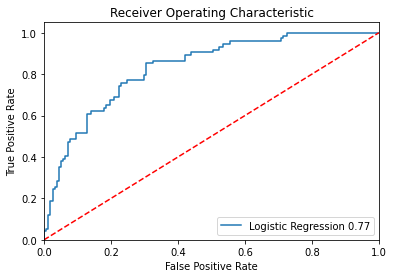

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression 0.77')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Chi Square
Next we can also use the Chi Square test to see how our expected results compare to our actual results.

In [19]:
from scipy import stats

target=df['Outcome'].reset_index(drop=True).copy()
chi_sq=[]
for i in range(0,9):
    chi_sq.append([stats.chi2_contingency(pd.crosstab(target, df.iloc[:,i]))[0:2],i])
chi_sq.sort(reverse=True)
chi_sq

[[(763.6046352310092, 4.4187473707431515e-168), 8],
 [(533.0240955223882, 0.29290546216135716), 6],
 [(286.4702531379069, 0.04282346357874596), 5],
 [(269.7332418198132, 5.1045667798171764e-11), 1],
 [(227.7698297937357, 0.017596214168718233), 4],
 [(140.9375197044156, 2.3069818149863462e-10), 7],
 [(73.56289367672626, 0.016681406114890975), 3],
 [(64.59480868723006, 8.648349123362548e-08), 0],
 [(54.93396399567279, 0.1721569902912902), 2]]

## SVM
Another model we can use is the SVM Model. SVM uses a machine learning vector algorithms to make predictions from a data set.

In [20]:
ohe_df = df

g_df=(ohe_df-ohe_df.mean())/(2*ohe_df.std())
a = (ohe_df['Pregnancies'] - ohe_df['Pregnancies'].mean())/ohe_df['Pregnancies'].std()
b = (ohe_df['Glucose'] - ohe_df['Glucose'].mean())/ohe_df['Glucose'].std()
c = (ohe_df['BloodPressure'] - ohe_df['BloodPressure'].mean())/ohe_df['BloodPressure'].std()
d = (ohe_df['Insulin'] - ohe_df['Insulin'].mean())/ohe_df['Insulin'].std()
d = (ohe_df['BMI'] - ohe_df['BMI'].mean())/ohe_df['BMI'].std()
d = (ohe_df['DiabetesPedigreeFunction'] - ohe_df['DiabetesPedigreeFunction'].mean())/ohe_df['DiabetesPedigreeFunction'].std()
d = (ohe_df['Age'] - ohe_df['Age'].mean())/ohe_df['Age'].std()
d = (ohe_df['Outcome'] - ohe_df['Outcome'].mean())/ohe_df['Outcome'].std()
transformed_data = pd.DataFrame([a, b, c, d]).T
reg_df = ohe_df.drop(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'], axis =1 )
reg_df = reg_df.join(transformed_data)
reg_df

,Pregnancies,Glucose,BloodPressure,Outcome
0,5.059252e-01,0.864545,-0.033496,1.365006
1,-1.174524e+00,-1.205376,-0.529514,-0.731643
2,1.178105e+00,2.014501,-0.694853,1.365006
3,-1.174524e+00,-1.073952,-0.529514,-0.731643
4,2.985078e-16,0.503130,-2.678923,1.365006
...,...,...,...,...
763,1.850285e+00,-0.679682,0.297182,-0.731643
764,-8.384342e-01,0.010292,-0.198836,-0.731643
765,1.698354e-01,-0.022564,-0.033496,-0.731643
766,-1.174524e+00,0.141715,-1.025532,1.365006


## Conclusion
So as you can see, there are a lot of things that can be done when analyzing a data set. Through cleansing, regression, predictions and much more we we're able to extract different aspects of the data that weren't apparent at first. Using different techniques we we're able to also predict the data and compare our models to see the pros and cons of each. This is a great technique as it allows you to broaden your perspective on a specific data set and gives you more options on how to proceed. And in data analysis, having options is always a good thing.

## Sources
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
https://thispointer.com/pandas-delete-last-column-of-dataframe-in-python/
https://www.geeksforgeeks.org/how-to-add-column-from-another-dataframe-in-pandas/
https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-a-column-in-pandas-dataframe
https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70
https://www.geeksforgeeks.org/python-pandas-dataframe-fillna-to-replace-null-values-in-dataframe/
https://www.adamsmith.haus/python/answers/how-to-replace-each-nan-value-in-a-pandas-dataframe-with-the-mean-of-its-column-in-python
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html
https://www.ibm.com/topics/knn#:~:text=The%20k%2Dnearest%20neighbors%20algorithm%2C%20also%20known%20as%20KNN%20or,of%20an%20individual%20data%20point.
https://www.geeksforgeeks.org/random-numbers-in-python/
https://stackoverflow.com/questions/3996904/generate-random-integers-between-0-and-9